<a href="https://colab.research.google.com/github/SayyedAliT/Artificial-Intelligence-Course-/blob/main/Assignment2/Assignment_2_KNN_SVM_GBT_XGBoost_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Assignment 2-2024**
#**Due Date: May 23 2024**


#**This notebook has four parts.**

#**[Part I]:  The K-Nearest Neighbors (KNN) Algorithm**
#**[Part II]: Support Vector Machines Algorithm**
#**[Part III]:  The Gradient-Boosting Algorithm.**
#**[Part IV]: Extreme Gradient Boosting(XGBoost)Algorithm**













In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image

#**Part I**

#**The K-Nearest Neighbors (KNN) Algorithm**
#**The KNN model is a supervised machine learning model. The kNN model is also one of the simpler models.**



#**Mathematical Definition of Nearest Neighbors**
#**The definition of nearest neighbors is based on the computation of the** **Euclidean distance from the new data point to each of the existing data**
$$ d(p,q) = \sqrt {{{({p_1} - {q_1})}^2} + {{({p_2} - {q_2})}^2} + ...{{({p_n} - {q_n})}^2}}$$

#**When we use the kNN algorithm, we need to identify the closest neighbors. Once we have identified the k neighbors that are closest to our new data point, we do not yet have a prediction. There is one step remaining to convert the multiple neighbors into one prediction. There are two prevalent methods for it.**


#**1.The first method is to take the average of the target value of the k nearest neighbors. This average is then used as the prediction**.

#**2.The second method is to take the weighted average of the k nearest neighbors and use their distances as the inverse weight so that closer points are weighted heavier in the prediction.**
#**Deciding on the Number of Neighbors k**
#**How many nearest neighbors should we include in the prediction? The value of k decides this. To apply this, let us see two cases – one nearest neighbor and three nearest neighbors – and see the difference in prediction. The two are given in the figure below**



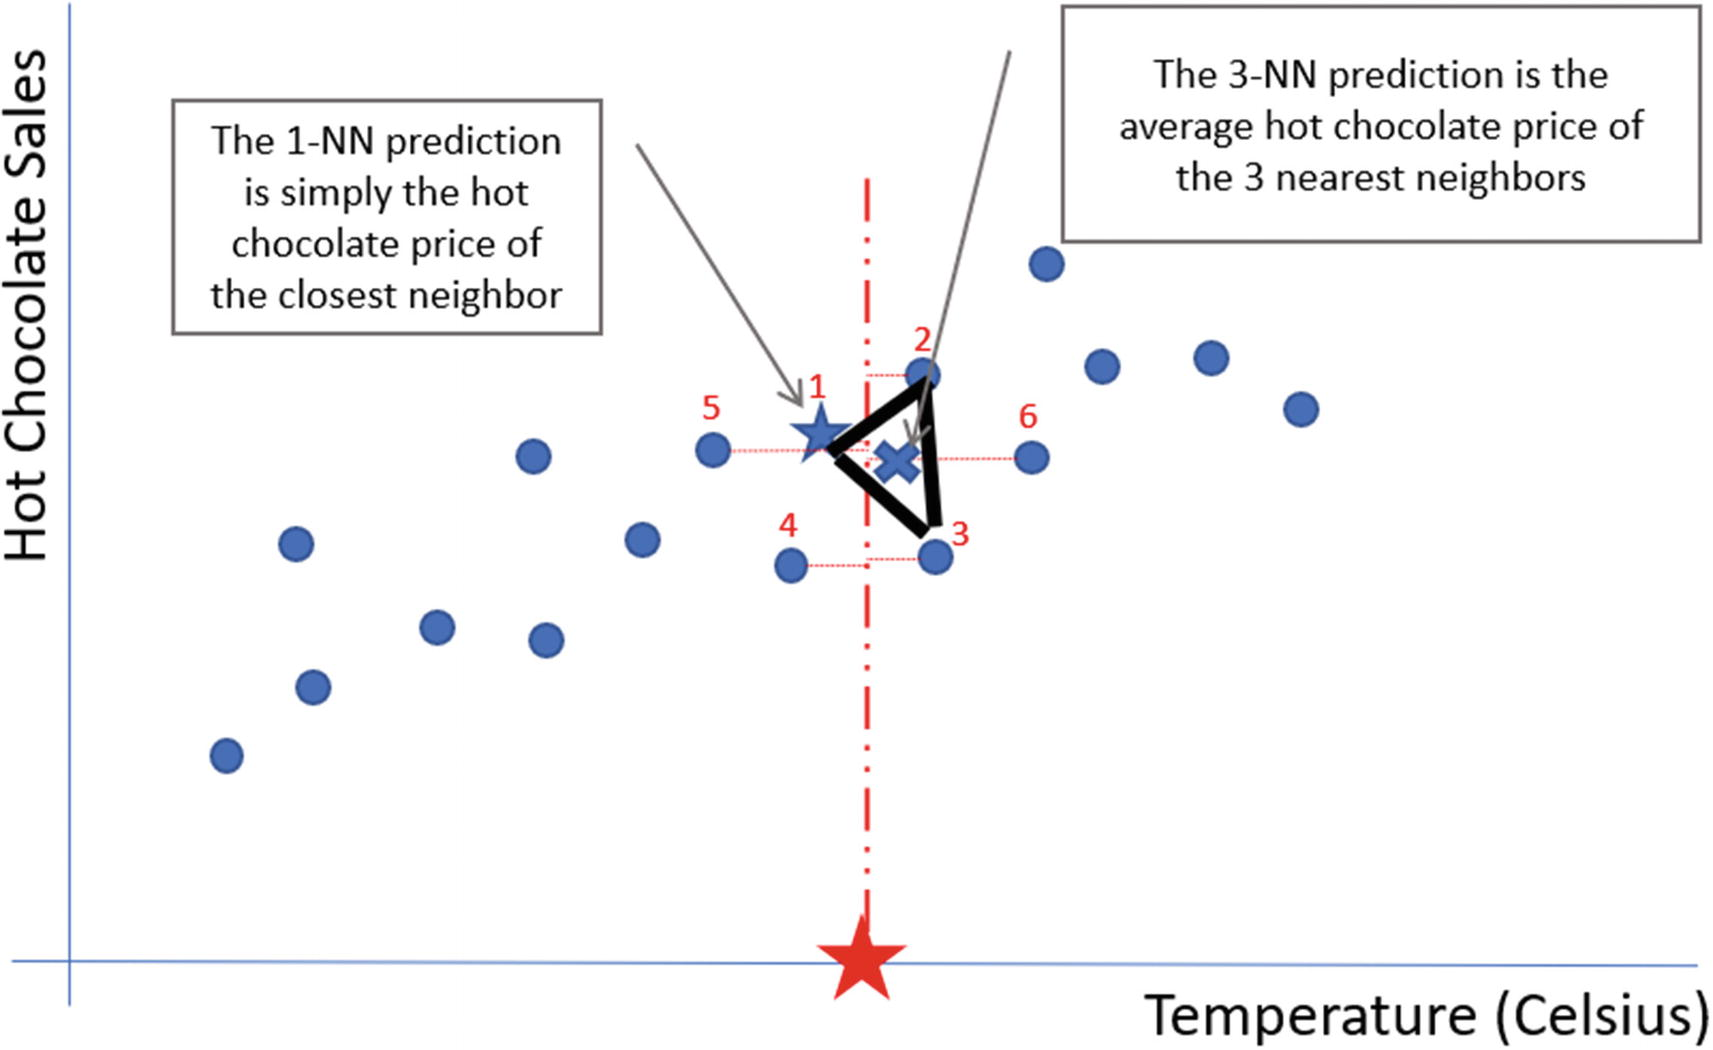

In [ ]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/KNN.jpg', width=900,height=900)

> # **Numerical Example:**



Dataset:
We have the following 5 points with their respective target values:

Point A: (1, 1) with target value 5


Point B: (2, 1) with target value 4


Point C: (3, 2) with target value 3


Point D: (4, 3) with target value 2


Point E: (5, 4) with target value 1


We want to predict the target value for the new point (3, 3) using weighted KNN with
𝑘
=
3
.


Calculate Euclidean Distances:


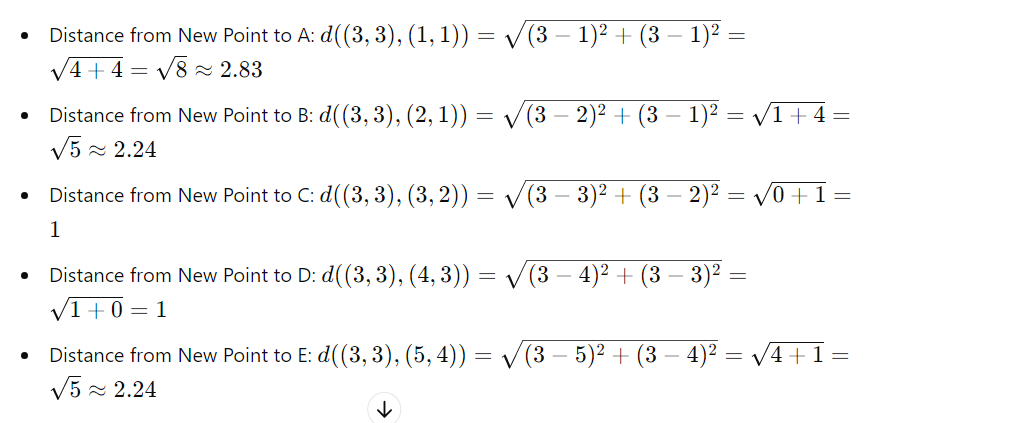
Identify the 3 Nearest Neighbors:

Nearest neighbors are C, D, and B (with distances 1, 1, and 2.24 respectively).
Calculate Weights:

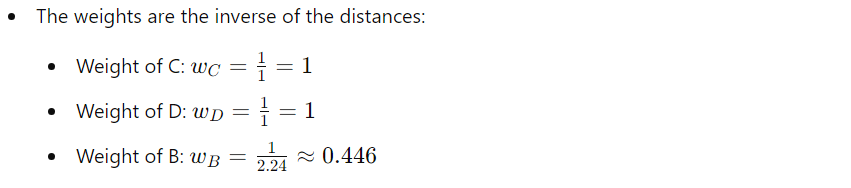


Weighted Average Calculation:

Target values and weights:
C: Target value = 3, Weight = 1


D: Target value = 2, Weight = 1


B: Target value = 4, Weight = 0.446


Weighted sum of target values:
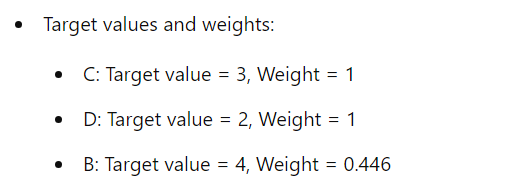


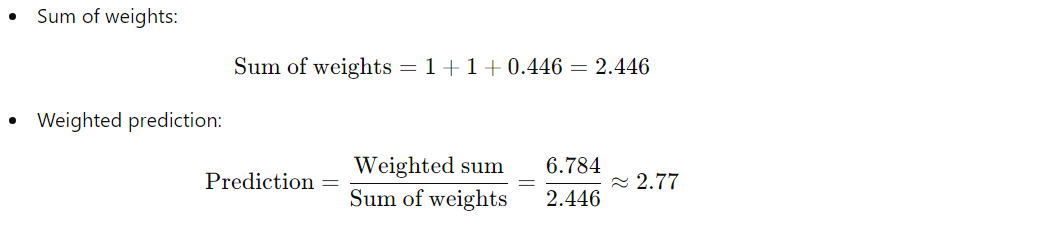

Result:
>The predicted target value for the new point (3, 3) using weighted KNN with
>𝑘
>=
>3
> is approximately 2.77.

this exmple for $ k = 1$ will be solved with identifying the value of nearest point $==>$ $1$

# **For method 1:**

Identify the 3 Nearest Neighbors:

Nearest neighbors are C, D, and B (with distances 1, 1, and 2.24 respectively).

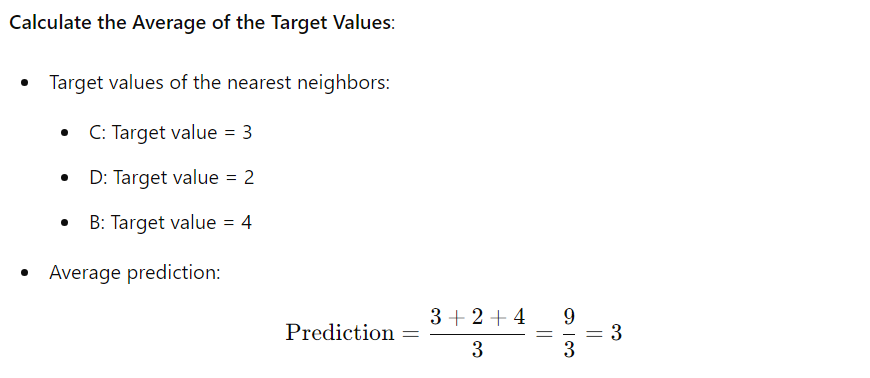

Result:
The predicted target value for the new point (3, 3) using KNN with $k=3$ is 3.

$k=1$ or $k=3$:

Overfitting happens when a model becomes too complex, capturing noise or irrelevant patterns from the training data. In the context of KNN, overfitting can occur when we set K to a very small value, such as 1 or 2. This causes the model to become overly sensitive to local variations in the training data, leading to poor generalization to unseen data.
For example, consider a case where K = 1. The decision boundary between classes will follow each individual training sample closely, resulting in a model that tries to memorize the training data rather than learning the underlying patterns. This can lead to overfitting, where the model performs well on the training data but fails to generalize to new, unseen examples.

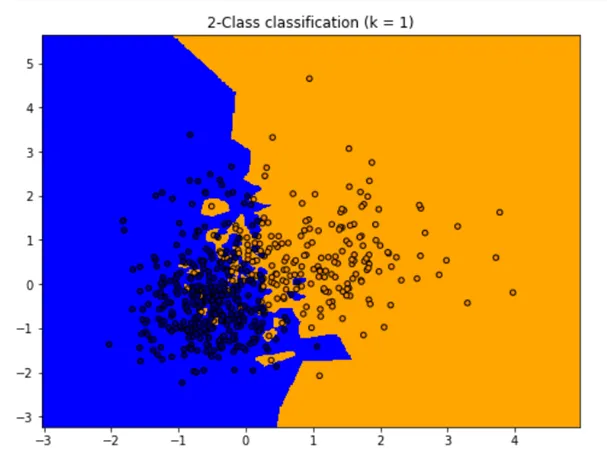

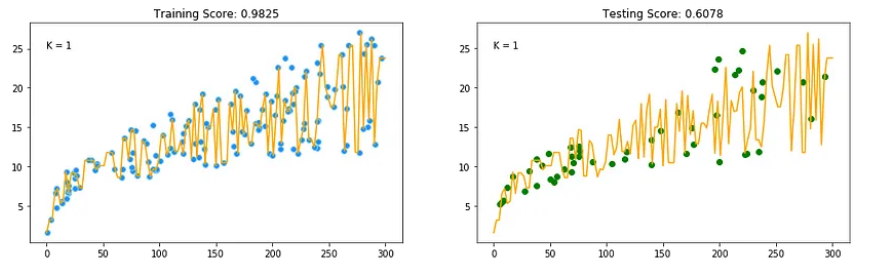

#**1.Import libraries.**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#**2. Import the traffic data.**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Metro-Data/Metro_Interstate_Traffic_Volume.csv')

#**3. The seasonality variables are necessary for the modeling here. We create Year, Month, Weekday, Hour, IsHoliday.**

In [ ]:
data['year'] = data['date_time'].apply(lambda x: x[:4])
data['month'] = data['date_time'].apply(lambda x: x[5:7])
data['weekday'] = pd.to_datetime(data['date_time']).apply(lambda x: x.weekday())
data['hour'] = pd.to_datetime(data['date_time']).apply(lambda x: x.hour)
data['isholiday'] = (data['holiday'] == 'None').apply(float)



#**4A. Feature engineering to create the additional explanatory variables.**
#**4B. Split the data into train and test and fit a default kNN model.**
#**4C. Obtain the R2**


In [ ]:
X = data[['year', 'month', 'weekday', 'hour', 'isholiday']]
y = data['traffic_volume']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=12345, shuffle=False)
my_dt = KNeighborsRegressor()
my_dt.fit(X_train, y_train)
fcst = my_dt.predict(X_test)
print(r2_score(list(y_test), list(fcst)))


0.970238265560862


#**5. Verify our results visually.**

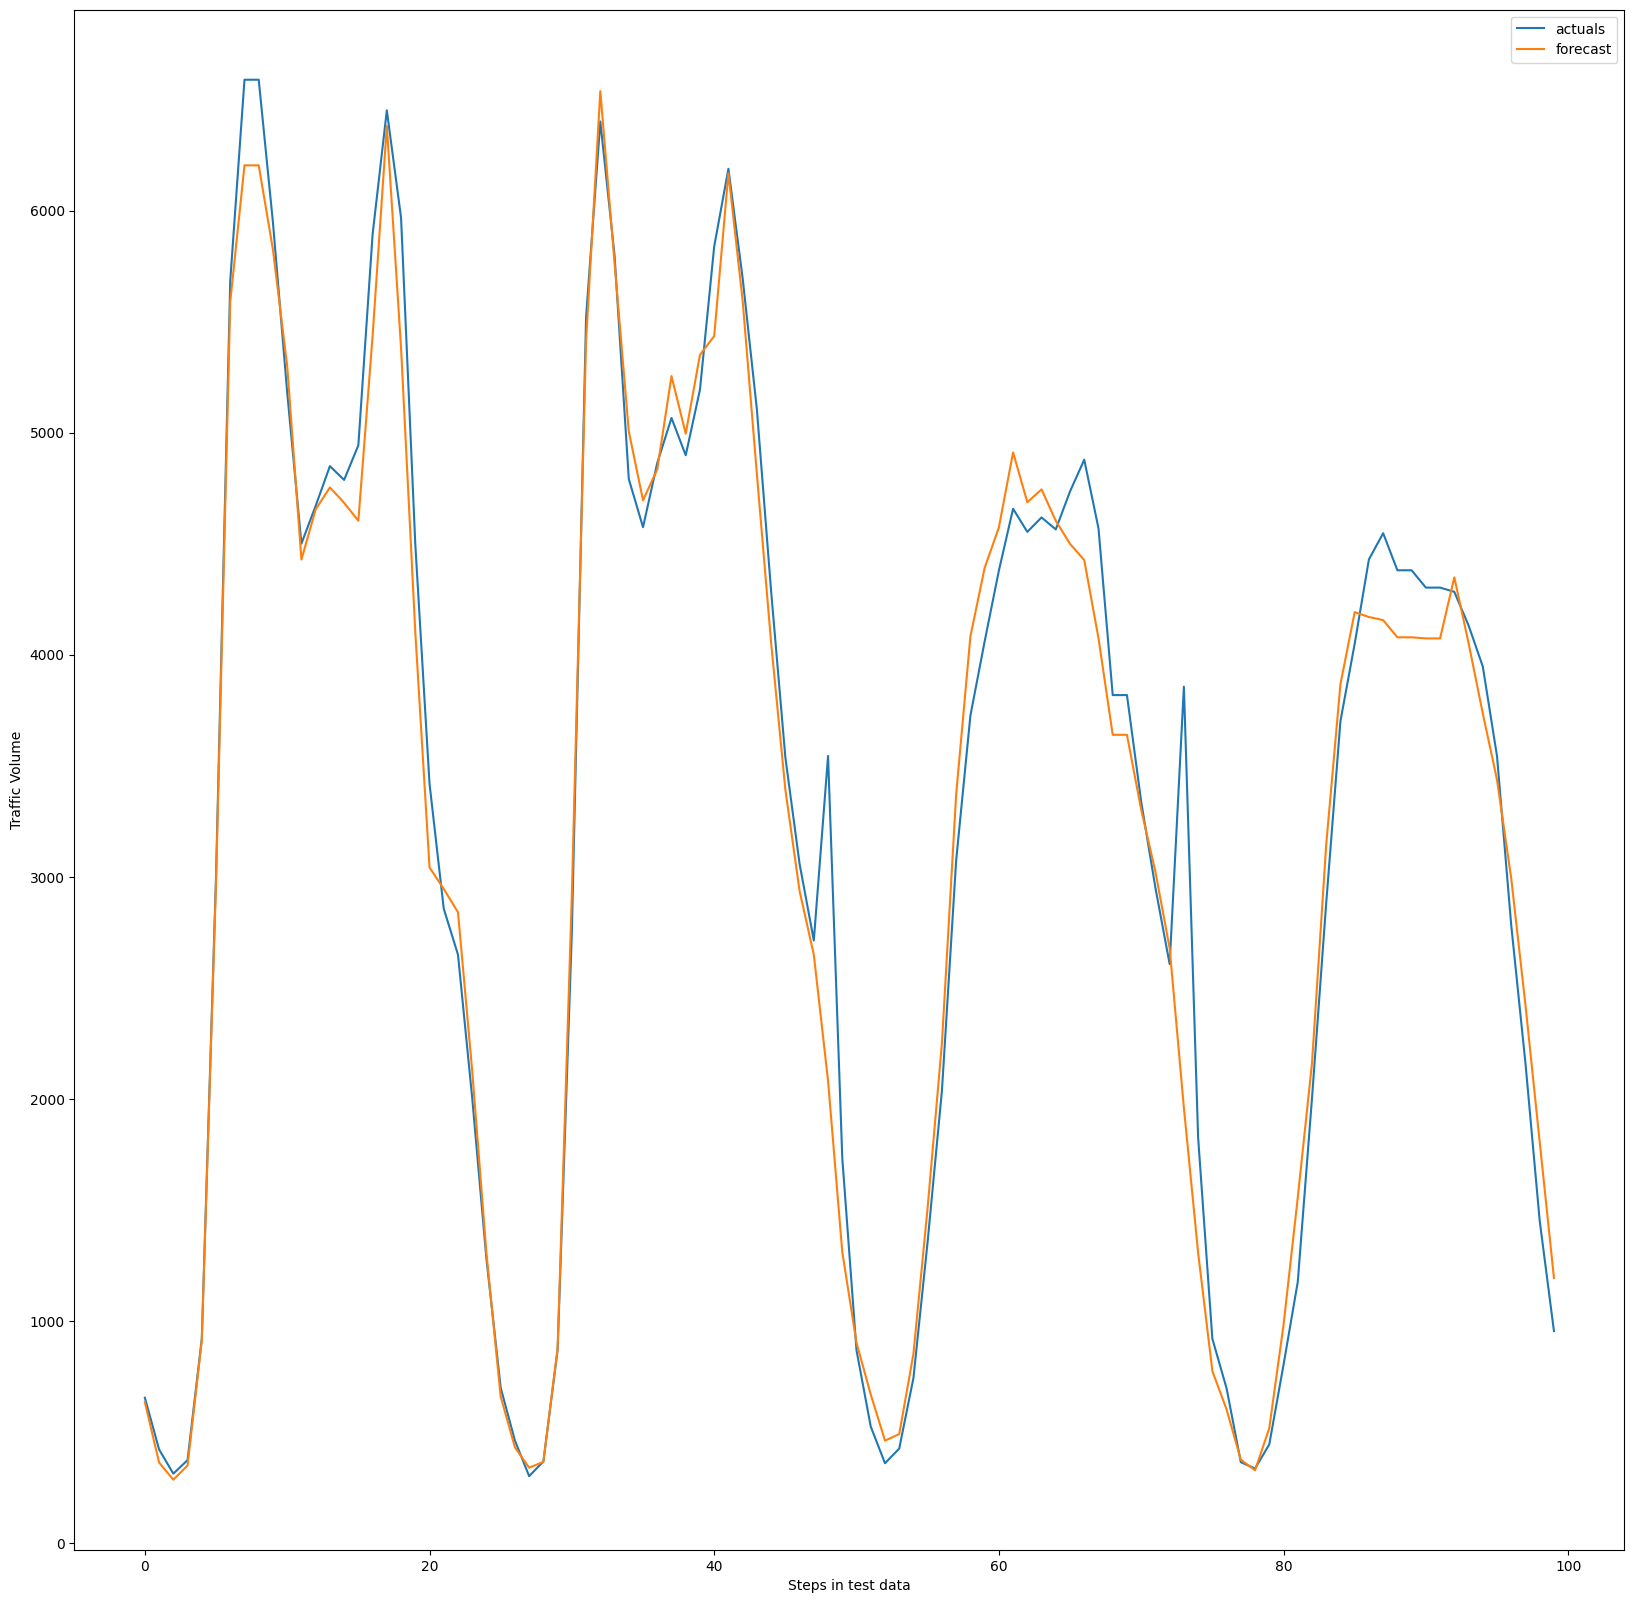

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(list(y_test))
plt.plot(list(fcst))
plt.legend(['actuals', 'forecast'])
plt.ylabel('Traffic Volume')
plt.xlabel('Steps in test data')
plt.show()


#**Part II**
#**Support Vector Machines Algorithm**

#**1.The fundamental idea behind Support Vector Machines is to fit the largest possible street/margin between the decision boundary that separates the two classes and the training instances. When performing soft margin classification, the SVM searches for a compromise between perfectly separating the two classes and having the widest possible margin. Another key idea is to use kernels when training on nonlinear datasets.**

#**2.The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector (i.e., is off the street/margin) has no influence whatsoever; you could remove them, add more instances, or move them around, and as long as they stay off the street, they will not affect the decision boundary. Computing the predictions only involve the support vectors, not the whole training set.**

#**3.SVMs will fit the largest possible “street” between the classes (see the first answer), so if the training set is not scaled, the SVM will tend to neglect small features (see Figure below this cell).**

#**4.The SVM classifier can output the distance between the test instance and the decision boundary. We can use this as a confidence score. However, this score cannot be directly converted into an estimation of the class probability. If you set probability=True when creating an SVM in Scikit-Learn, then after training, it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the predict_proba() and predict_log_proba() methods to the SVM.**



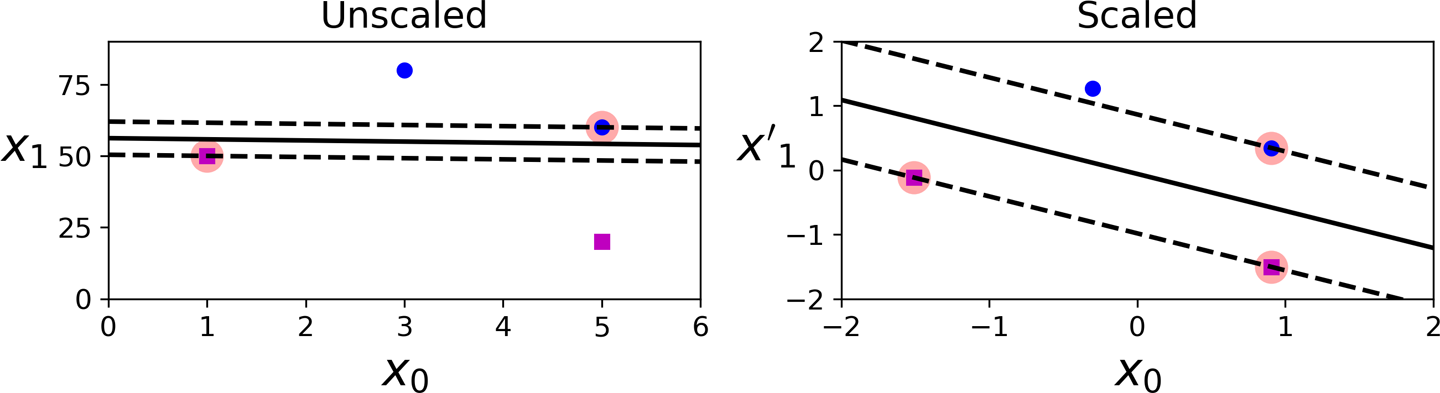

In [ ]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM.png', width=900,height=900)

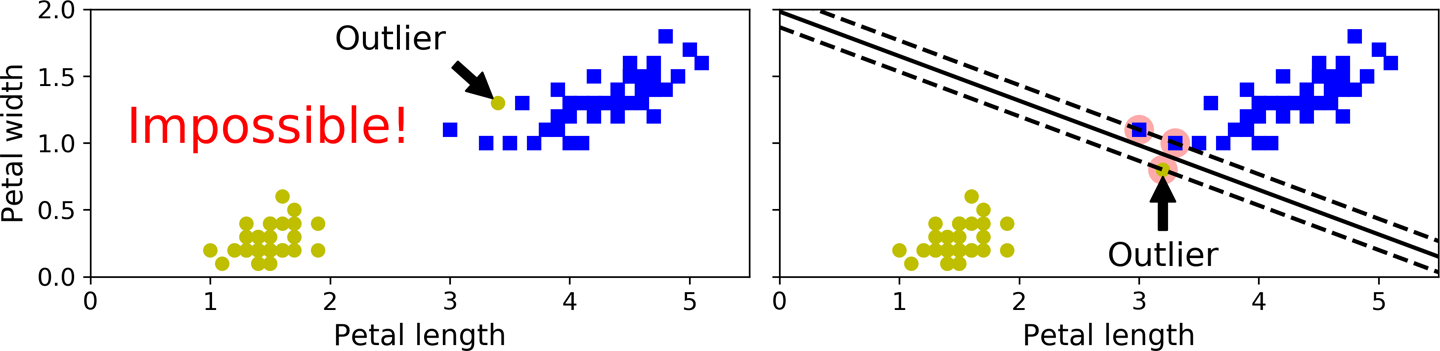

In [ ]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM-1.png', width=900,height=900)

#**Soft Margin Classification**
#**If we strictly impose that all instances must be off the street and on the right side, this is called hard margin classification. There are two main issues with hard margin classification. First, it only works if the data is linearly separable. Second, it is sensitive to outliers. The above figure(SVM-1) shows the iris dataset with just one additional outlier: on the left, it is impossible to find a hard margin; on the right, the decision boundary ends up very different from the one in the Figure below (SVM-2) without the outlier, and it will probably not generalize as well. To avoid these issues, we use a more flexible model. The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations (i.e., instances that end up in the middle of the street or even on the wrong side). This is called soft margin classification.**


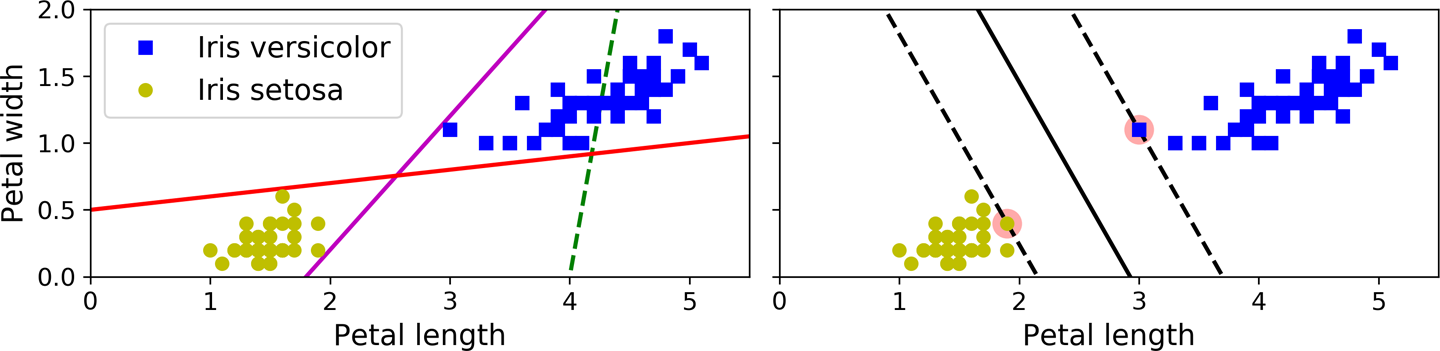

In [ ]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM-2.png', width=900,height=900)

#**Nonlinear SVM Classification**
#**Although linear SVM classifiers are efficient and work  well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset. Consider the left plot in Figure 5-5: it represents a simple dataset with just one feature, ${x_1}$.This dataset is not linearly separable( Figure below=SVM-3). But if you add a second feature  ${x_2} = {({x_1})^2}$ , the resulting 2D dataset is perfectly linearly separable.**


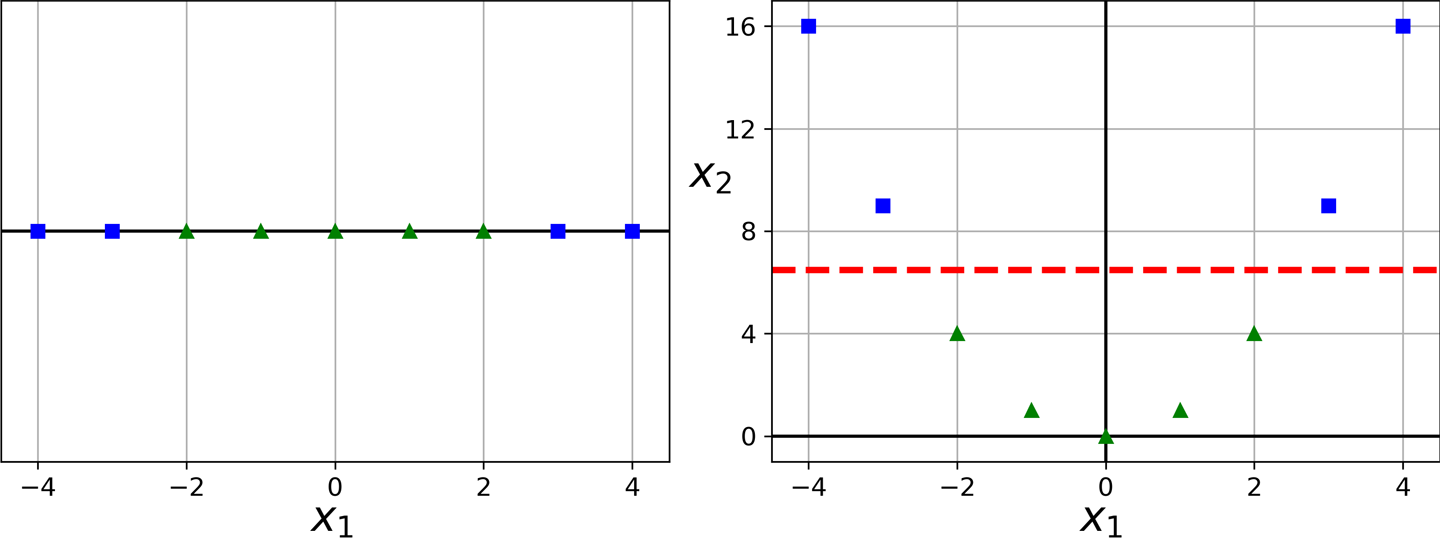

In [ ]:
Image(filename='/content/drive/MyDrive/Images-Slides-2024/SVM-3.png', width=900,height=900)

> # RBF Kernel Example:


**why we use RBF:**


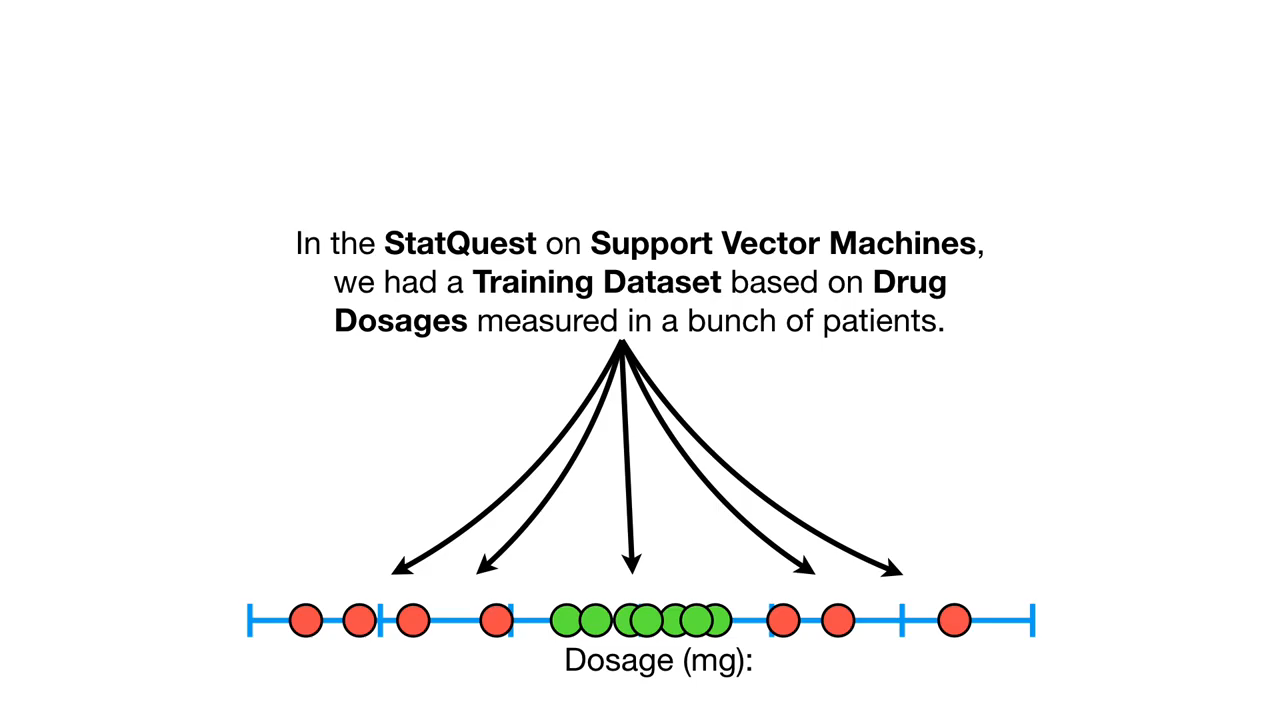


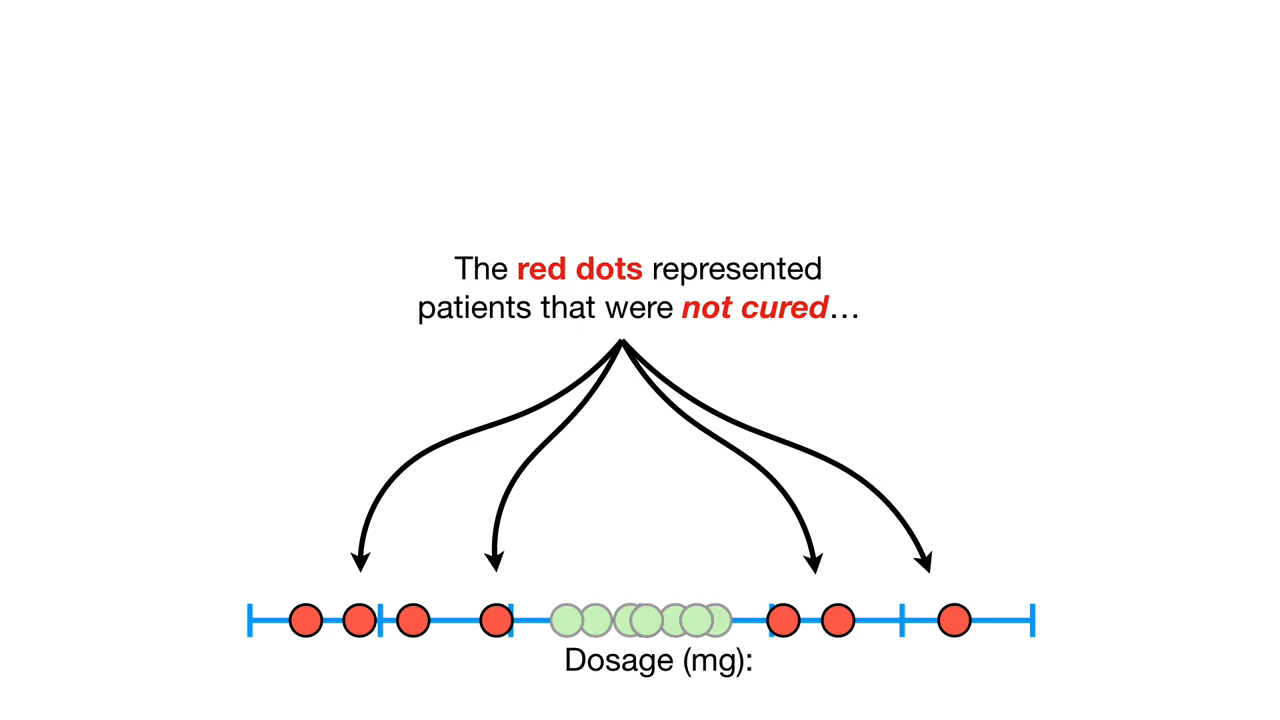

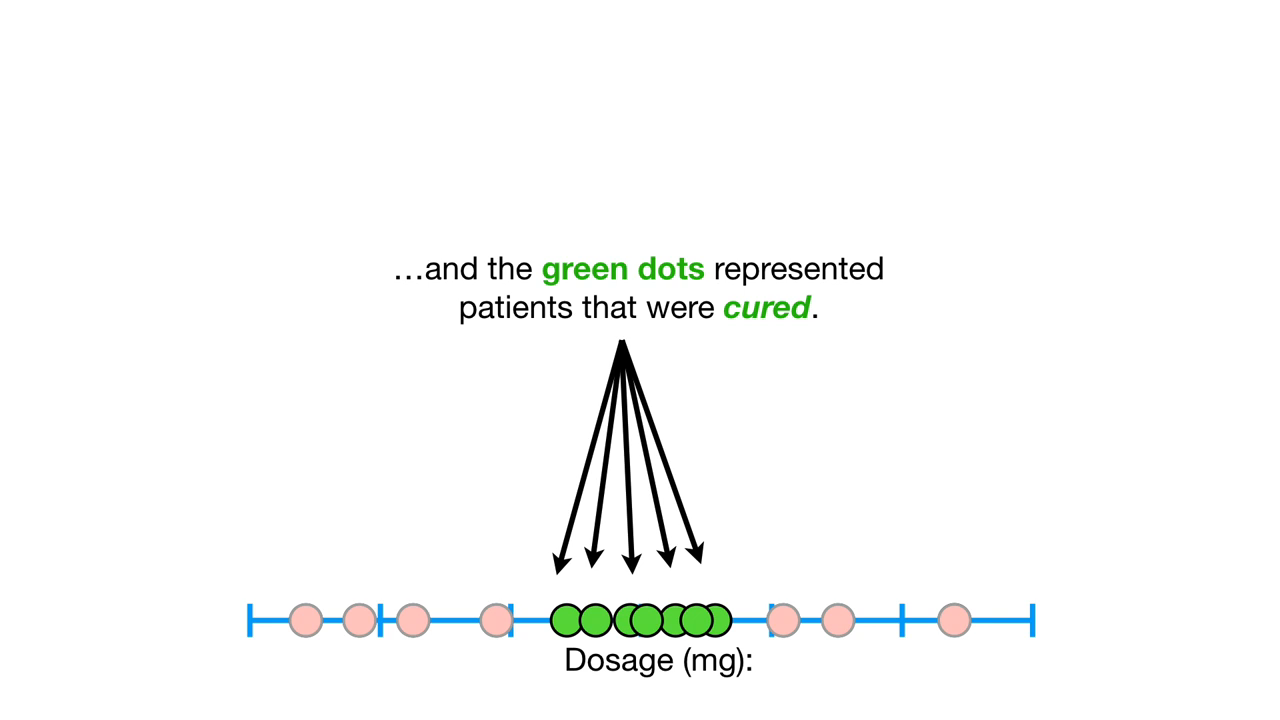

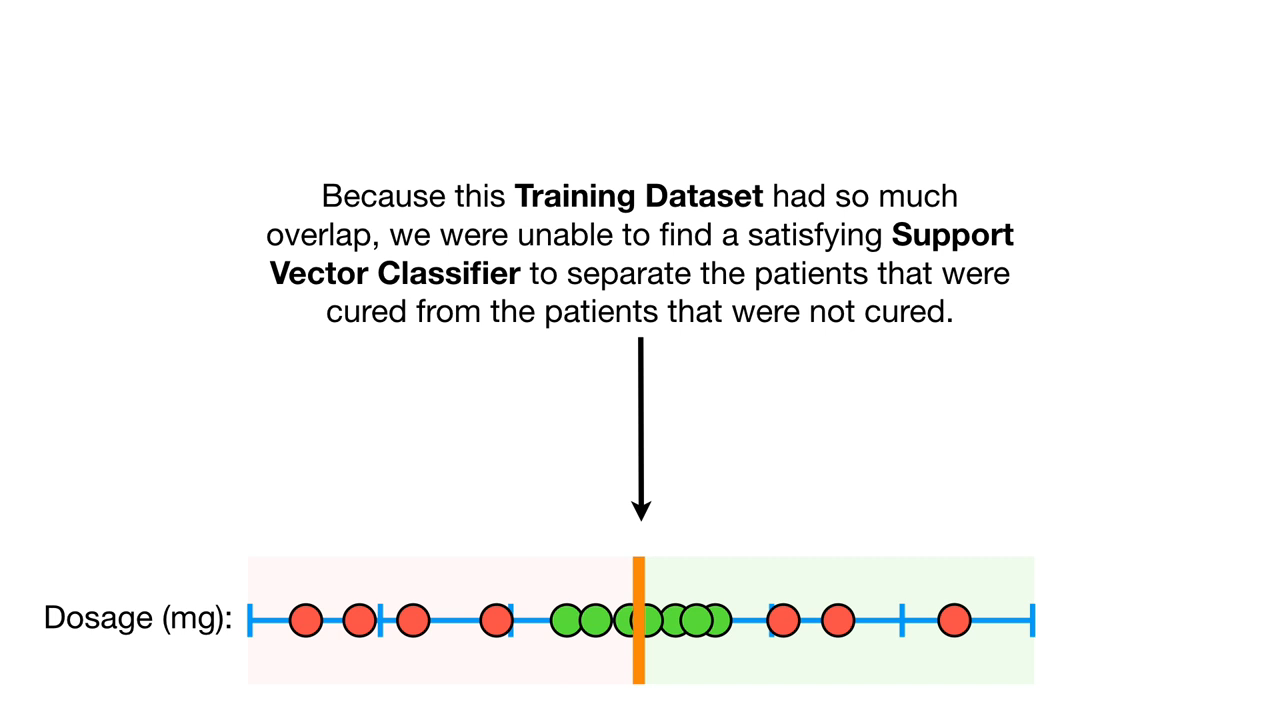

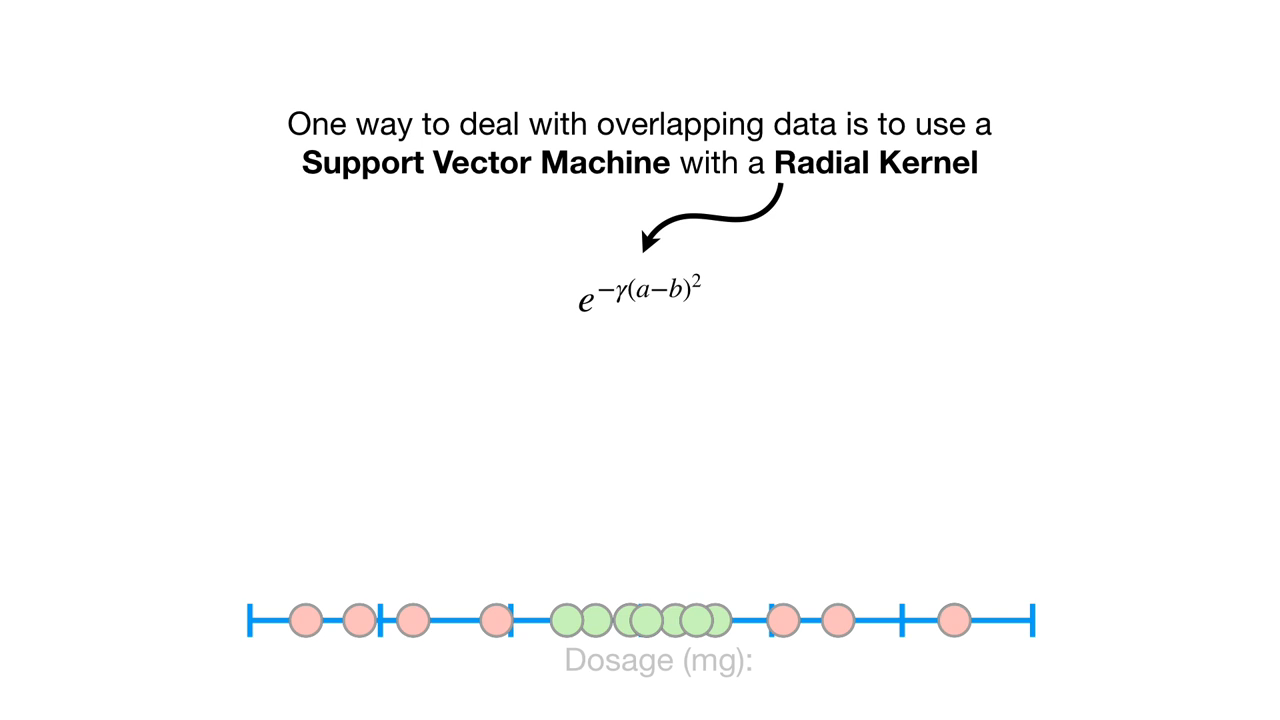

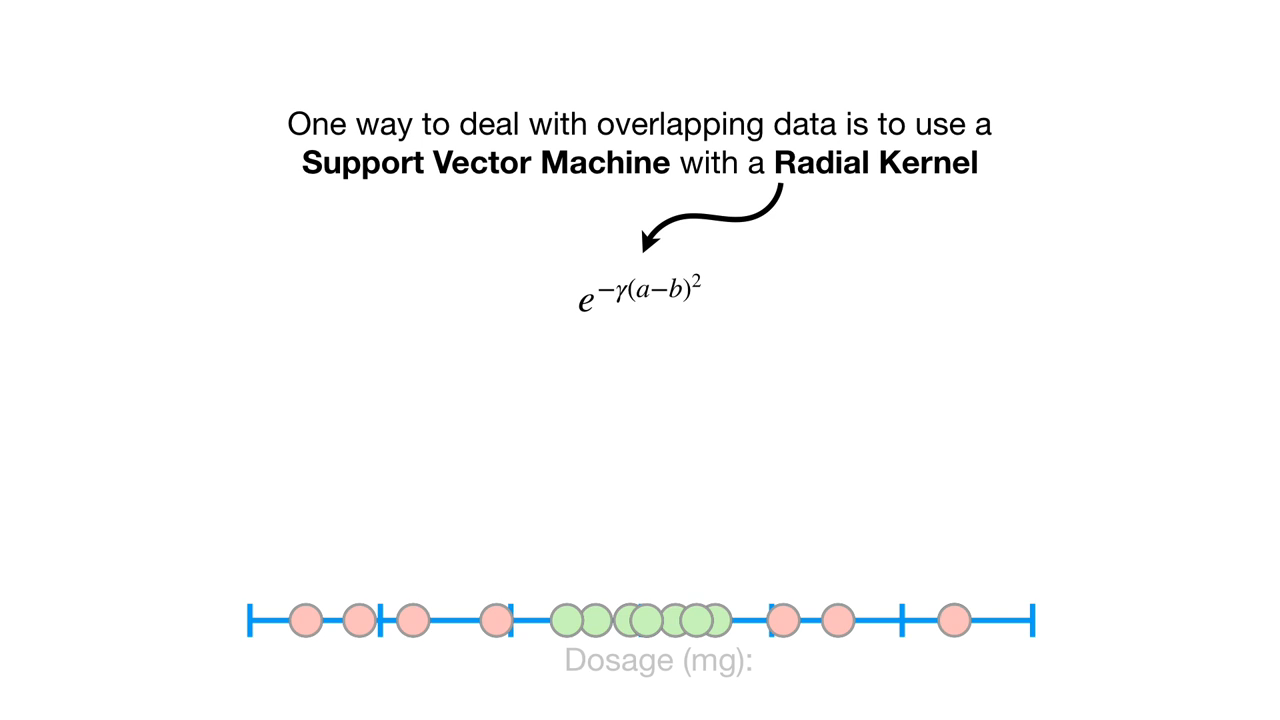

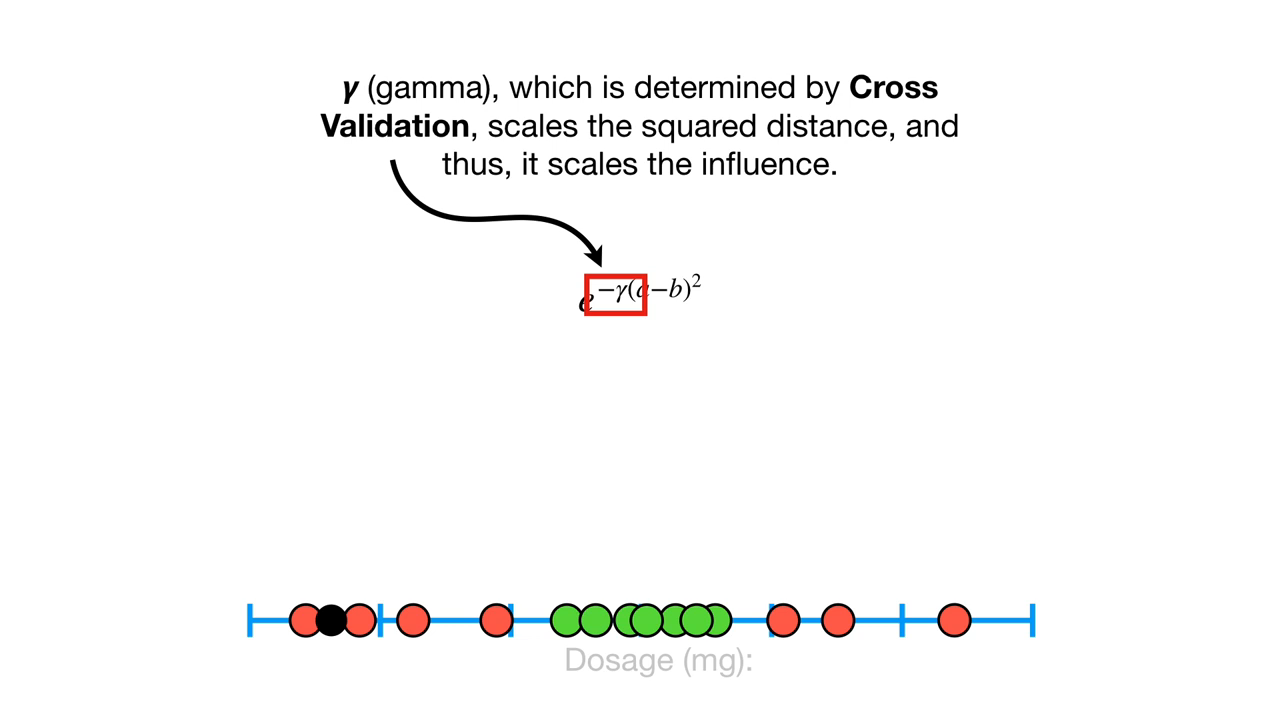

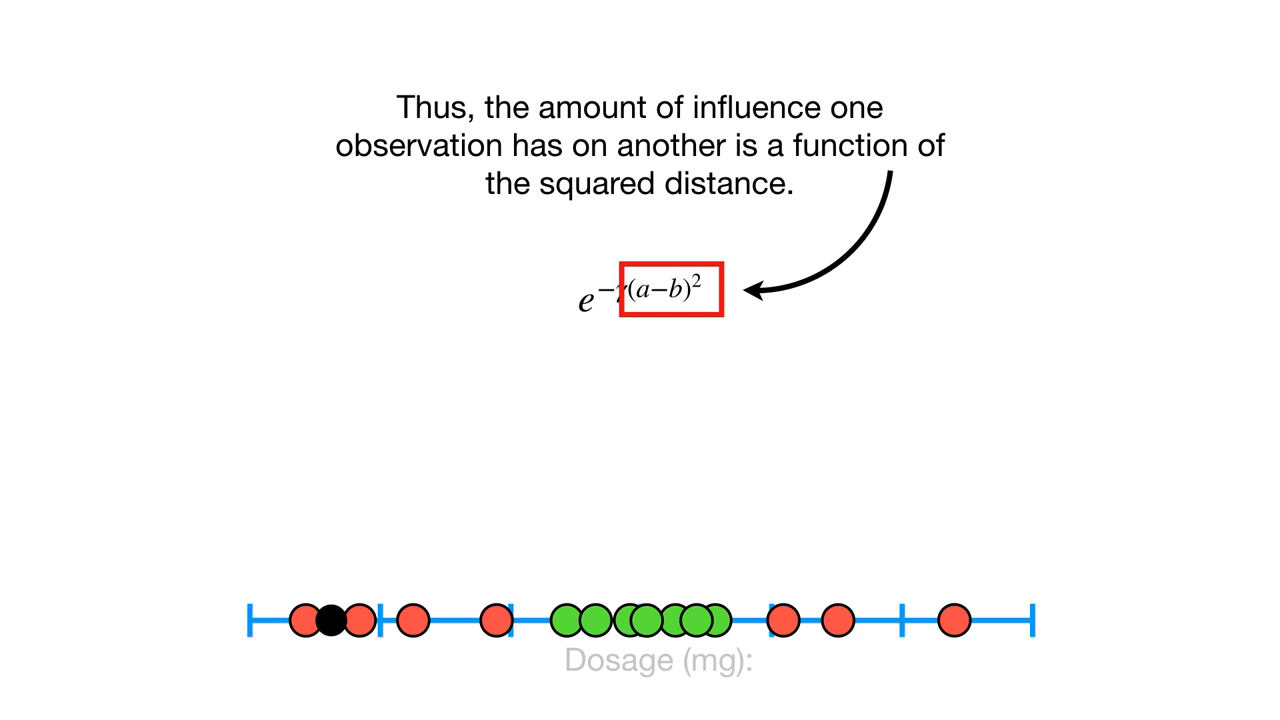

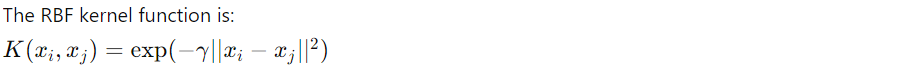



> **RBF Kernel:** Transforms the data into a higher-dimensional space using a radial basis function.

# An Example:

We have a dataset with two features (x1, x2) and two classes (0 and 1). The data points are as follows:


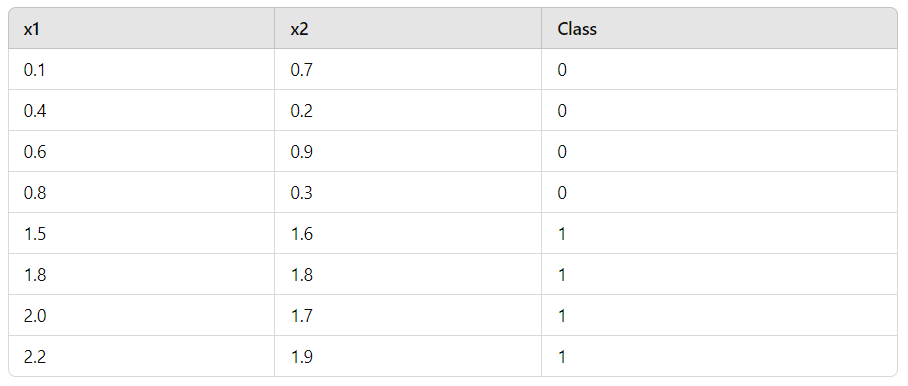

We will use an SVM with an RBF kernel to classify these data points.


this is our data ploting:

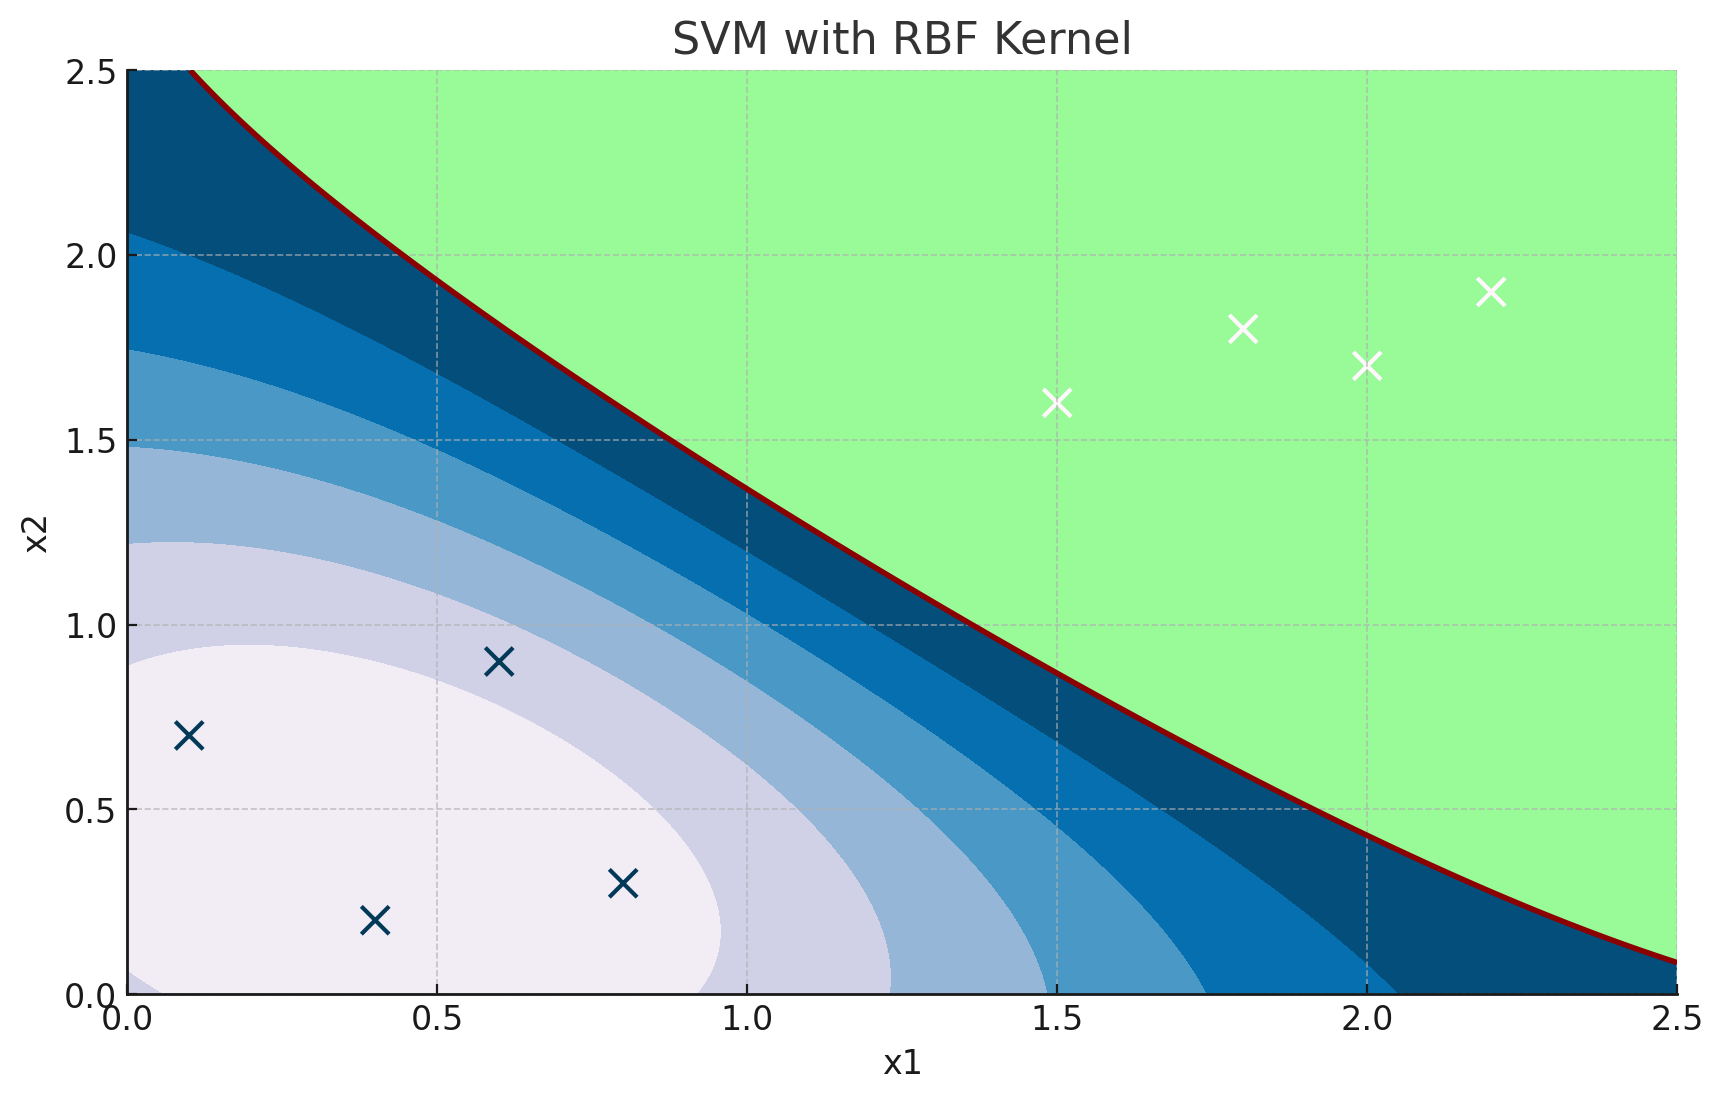

Class 0 points: (0.1, 0.7), (0.4, 0.2), (0.6, 0.9), (0.8, 0.3)


Class 1 points: (1.5, 1.6), (1.8, 1.8), (2.0, 1.7), (2.2, 1.9)

# **2. Apply RBF Kernel Transformation**

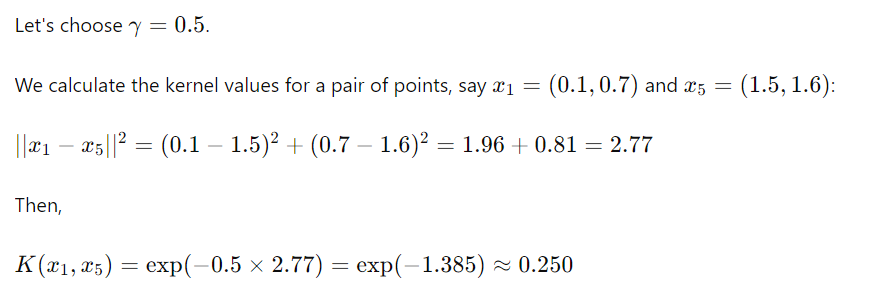



# 3. Calculate the Kernel Matrix


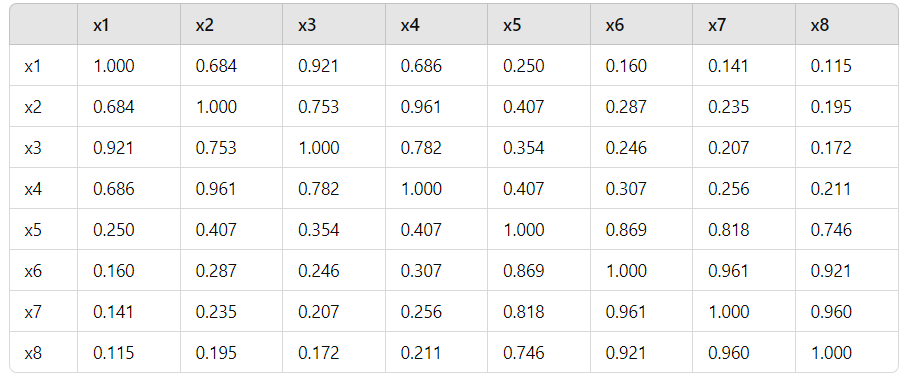



# **4. Train the SVM:**

We solve the optimization problem using the kernel matrix  𝐾 to find the optimal weights
$𝛼_𝑖$ and the bias 𝑏.

# **5. Determine the Decision Boundary**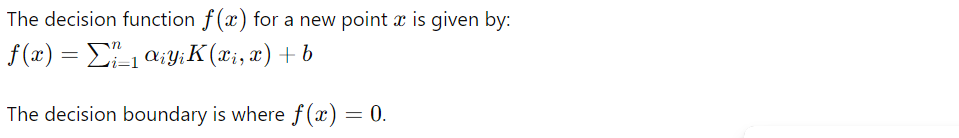

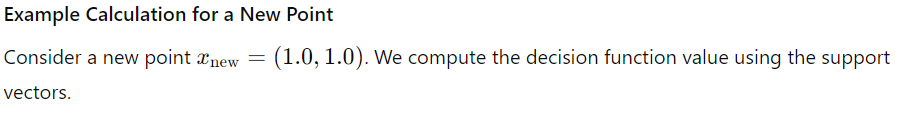

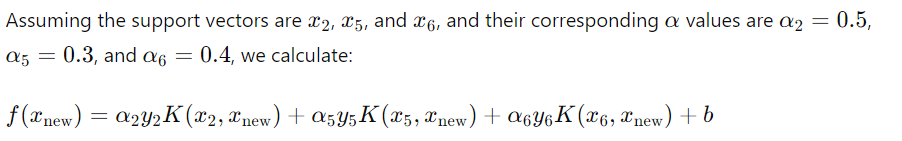

some equations:

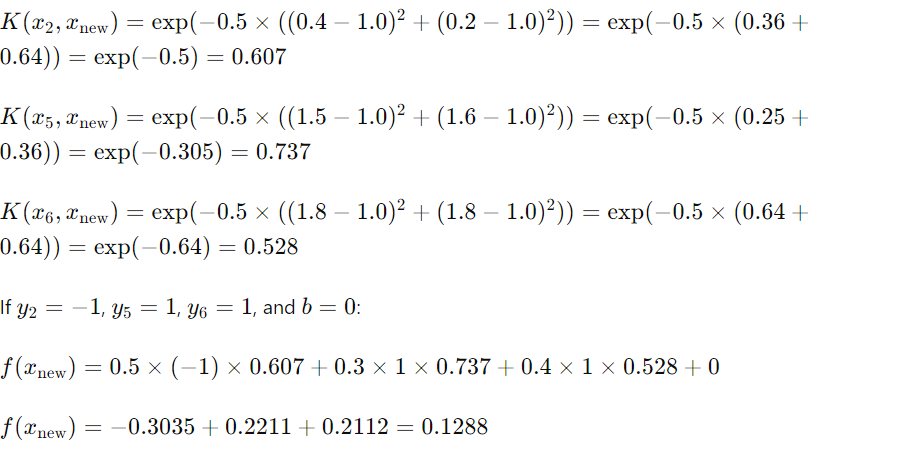

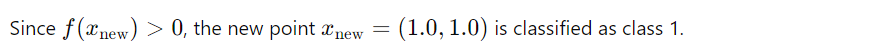

#**Model 1**

#**1.Import libraries.**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


#**2. We load our data.**

In [ ]:
dataset = load_iris()
data = dataset.data
target = dataset.target


#**3. We perform preprocessing on our data.**

In [ ]:
sc = StandardScaler()
sc.fit_transform(data)


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

#**4. We do train test split.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, test_size=0.15)

#**5. We train our model.**

In [ ]:
model = SVC()
model.fit(X_train,y_train)


SVC()

#**6. We compute the accuracy score on our test data.**

In [ ]:
accuracy_score(y_test, model.predict(X_test))

1.0

#**Model 2**

#**1.Import libraries.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


#**2. We load our data.**

In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/Final-Dataset-Ready-N/final_dataset_ready.csv')
dataset = titanic.copy()
X = np.asarray(dataset.drop('Survived', axis=1))
y = np.asarray(dataset['Survived'])
y[y==0] = -1
X.shape
y[0:10]


array([-1,  1,  1,  1, -1, -1, -1, -1,  1,  1])

#**3. We do train test split.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape
print(X_test.shape,y_test.shape)


(179, 9) (179,)


#**4. We perform preprocessing on our data.**

In [ ]:
sc = StandardScaler()
X_train_normalized = sc.fit_transform(X_train)
X_test_normalized = sc.transform(X_test)


#**5. We train our model.**

In [ ]:
svmModel = SVC(kernel = 'rbf',C=2,gamma = 0.9)
svmModel.fit(X_train_normalized,y_train)


SVC(C=2, gamma=0.9)

#**6. We use our model to predict our test data.**

In [ ]:
Y_pred = svmModel.predict(X_test_normalized)
print(round(accuracy_score(y_test, Y_pred)*100,2))


80.45



#**Part III**

# **The Gradient-Boosting Algorithm**

# **Gradient-Boosted Tree (GBT) is another tree-based ensemble algorithm similar to Random Forest. GBTs use a technique known as boosting to create a strong learner from weak learners (shallow trees). GBTs train an ensemble of decision trees sequentially, with each succeeding tree decreasing the error of the previous tree. This is done by using the residuals of the previous model to fit the next model. This residual-correction process is performed a set number of iterations with the number of iterations determined by cross-validation until the residuals have been fully minimized.**








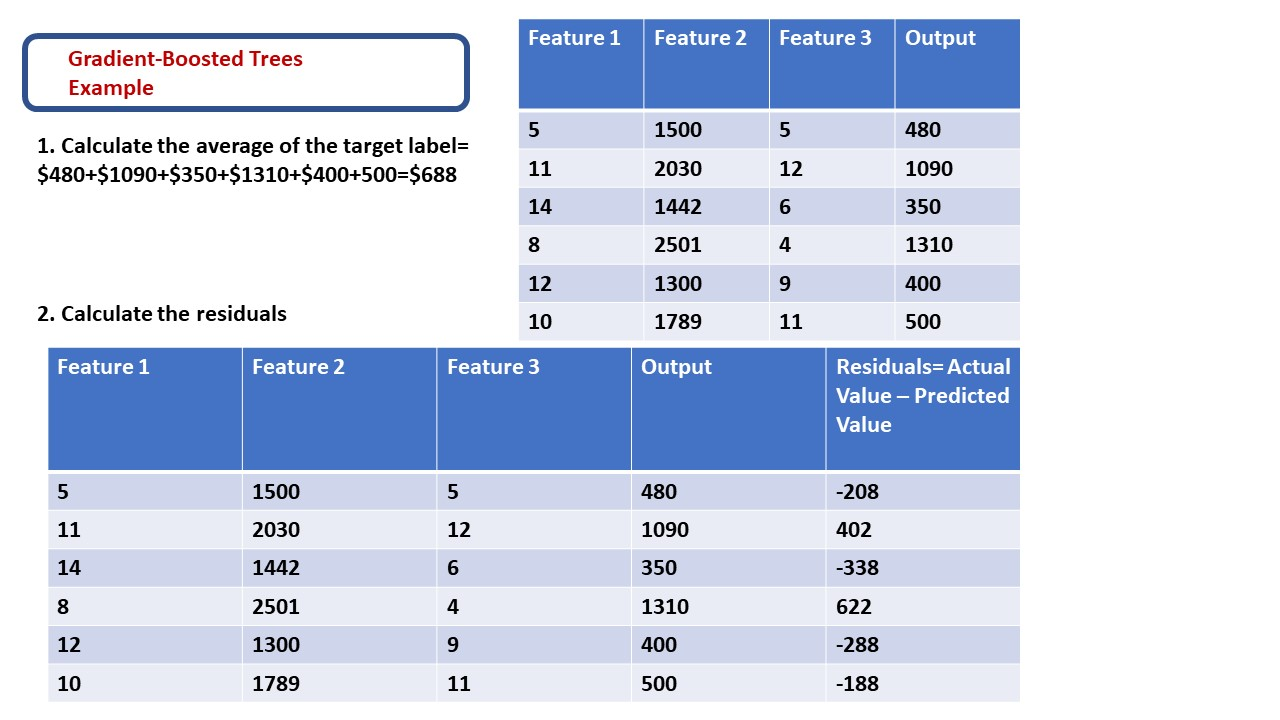

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost0.jpg', width=900,height=900)

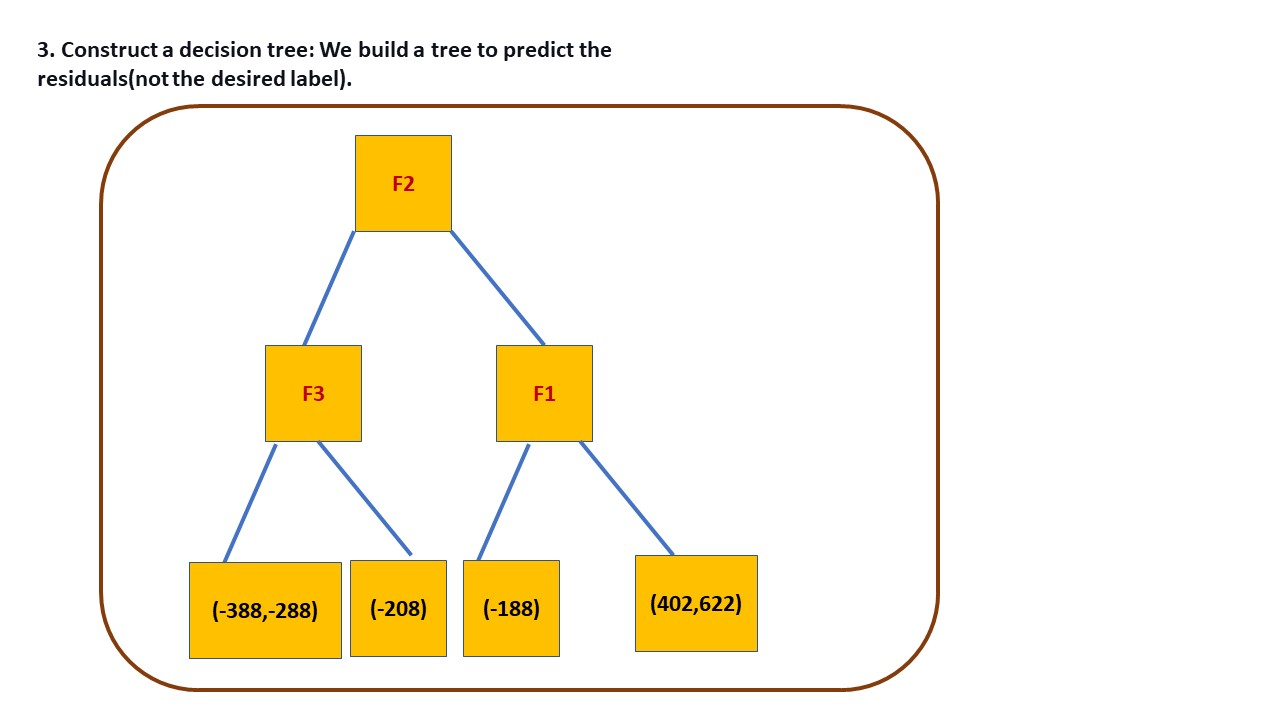

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost1.jpg', width=900,height=900)

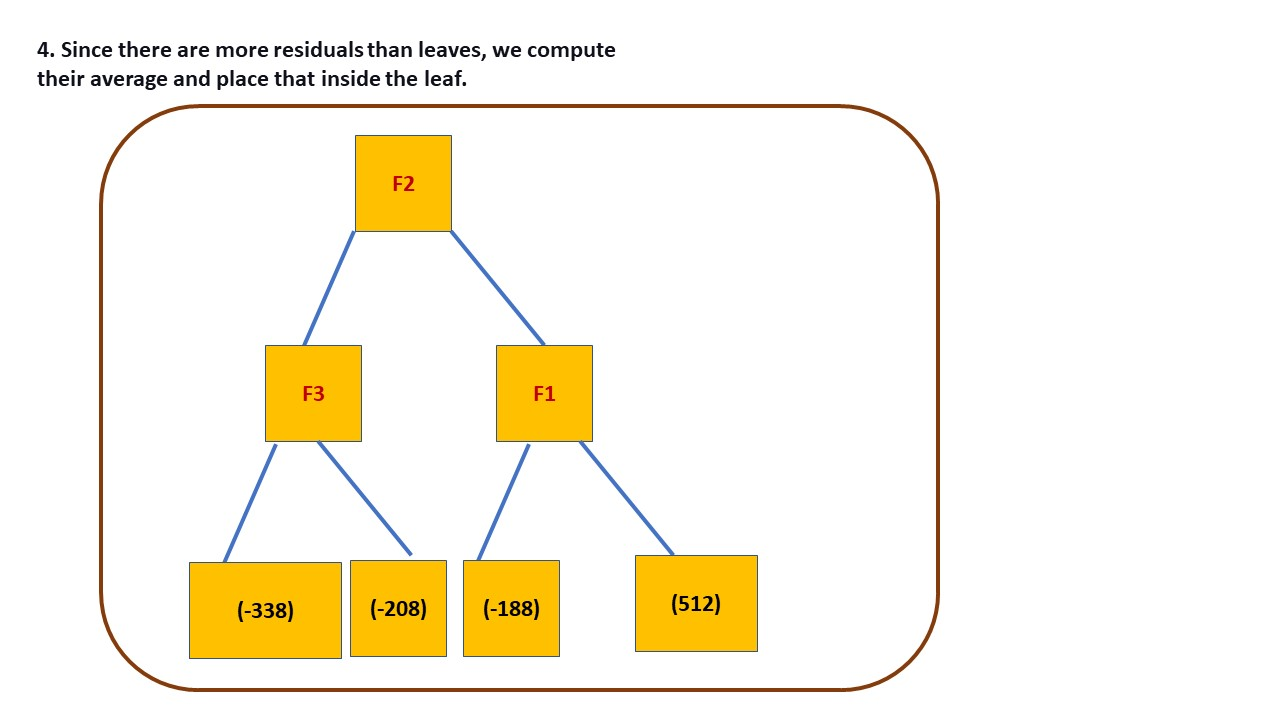

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/GBoost2.jpg', width=900,height=900)

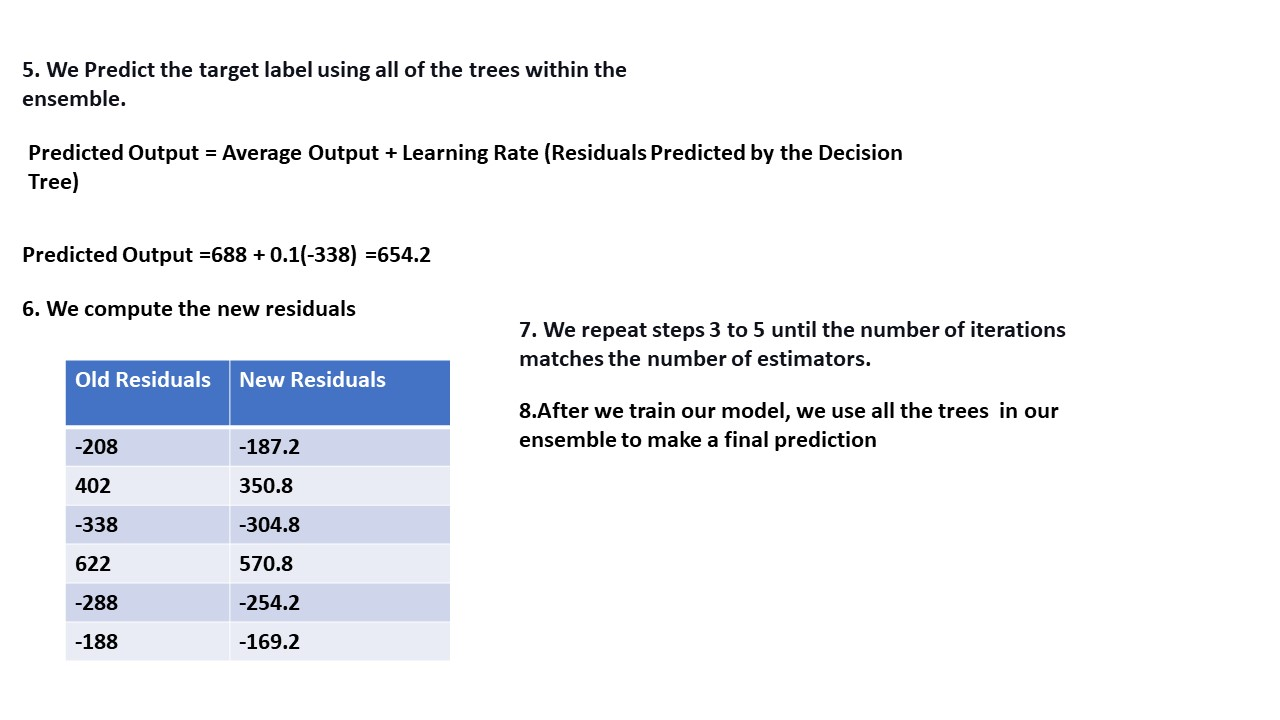

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DTRFXGB/Gboost3.jpg', width=900,height=900)

# **1.Import the necessary libraries for Gradient-Boosted Tree**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

# **2.We do train test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# **3. We use two nodes with three decision trees in GradientBoostingRegressor**

In [ ]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

# **4. We compute the errors and the best estimators.**

In [ ]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [ ]:
best_n_estimators

2

# **5. We use the best estimators and create our model.**




In [ ]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,

    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2)

# **6. We predict our test set**


In [ ]:
y_pred = best_regressor.predict(X_test)

# **7. compute the mean absolute error.**

In [ ]:
mean_absolute_error(y_test, y_pred)

2.6834813139263534

# **Part IV**
#**Extreme Gradient Boosting(XGBoost)Algorithm**

# **XGBoost is one of the best gradient-boosted tree implementations currently available. Released on March 27, 2014, by Tianqi Chen as a research project, XGBoost has become the dominant machine learning algorithm for classification and regression. XGBoost was designed using the general principles of gradient boosting, combining weak learners into a strong learner. But while gradient-boosted trees are built sequentially – slowly learning from data to improve its prediction in succeeding iteration, XGBoost builds trees in parallel.XGBoost produces better prediction performance by controlling model complexity and reducing overfitting through its built-in regularization. XGBoost uses an approximate algorithm to find split points when finding the best split points for a continuous feature. The approximate splitting method uses discrete bins to bucket continuous features, significantly speeding up model training. XGBoost includes another tree growing method using a histogram-based algorithm which provides an even more efficient method of bucketing continuous features into discrete bins. But while the approximate method creates a new set of bins per iteration, the histogram-based approach reuses bins over multiple iterations. This approach allows for additional optimizations that are not achievable with the approximate method, such as the ability to cache bins and parent and sibling histogram subtraction. To optimize sorting operations, XGBoost stores sorted data in in-memory units of blocks. Sorting blocks can be efficiently distributed and performed by parallel CPU cores. XGBoost can effectively handle weighted data via its weighted quantile sketch algorithm, can efficiently handle sparse data, is cache-aware, and supports out-of-core computing by utilizing disk space for large datasets, so data does not have to fit in memory.**

#**Import the necessary libraries for XGBoost Example**

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay


# **2. Import the data**


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/XB-Data/Telcom.csv')


In [ ]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# **3. Data exploration**

In [ ]:
df.drop(['Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'],
        axis=1, inplace=True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['Count'].unique()

array([1])

In [ ]:
df['Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df['State'].unique()

array(['California'], dtype=object)

In [ ]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [ ]:
df.drop(['CustomerID', 'Count', 'Country', 'State', 'Lat Long'],
        axis=1, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df['City'].unique()[0:10]

array(['Los_Angeles', 'Beverly_Hills', 'Huntington_Park', 'Lynwood',
       'Marina_Del_Rey', 'Inglewood', 'Santa_Monica', 'Torrance',
       'Whittier', 'La_Habra'], dtype=object)

In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [ ]:
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn_Value            int64
dtype: object

In [ ]:
df['Phone_Service'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Total_Charges'].unique()

array(['108.15', '151.65', '820.5', ..., '7362.9', '346.45', '6844.5'],
      dtype=object)

In [ ]:
len(df.loc[df['Total_Charges'] == ' '])

11

In [ ]:
df.loc[df['Total_Charges'] == ' ']

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [ ]:
df.loc[(df['Total_Charges'] == ' '), 'Total_Charges'] = 0

In [ ]:
df.loc[df['Tenure_Months'] == 0]

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,San_Bernardino,92408,34.084909,-117.258107,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,0
2438,Independence,93526,36.869584,-118.189241,Male,No,No,No,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,0
2568,San_Mateo,94401,37.590421,-122.306467,Female,No,Yes,No,0,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,0
2667,Cupertino,95014,37.306612,-122.080621,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,0
2856,Redcrest,95569,40.363446,-123.835041,Female,No,Yes,No,0,No,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,0
4331,Los_Angeles,90029,34.089953,-118.294824,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,0
4687,Sun_City,92585,33.739412,-117.173334,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,0
5104,Ben_Lomond,95005,37.078873,-122.090386,Female,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,0
5719,La_Verne,91750,34.144703,-117.770299,Male,No,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,0
6772,Bell,90201,33.970343,-118.171368,Female,No,Yes,Yes,0,Yes,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,0


In [ ]:
df['Total_Charges'] = pd.to_numeric(df['Total_Charges'])
df.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
Churn_Value            int64
dtype: object

In [ ]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [ ]:
df.size

169032

# **4. Split our data**


In [ ]:
X = df.drop('Churn_Value', axis=1).copy()
X.head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


In [ ]:
y = df['Churn_Value'].copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn_Value, dtype: int64


# **5. We format the data with One-Hot Encoding**



In [ ]:
X.dtypes

City                  object
Zip_Code               int64
Latitude             float64
Longitude            float64
Gender                object
Senior_Citizen        object
Partner               object
Dependents            object
Tenure_Months          int64
Phone_Service         object
Multiple_Lines        object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges        float64
dtype: object

In [ ]:
pd.get_dummies(X, columns=['Payment_Method']).head()

,City,Zip_Code,Latitude,Longitude,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Monthly_Charges,Total_Charges,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,Los_Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,Month-to-month,Yes,53.85,108.15,False,False,False,True
1,Los_Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,Month-to-month,Yes,70.70,151.65,False,False,True,False
2,Los_Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,Yes,Month-to-month,Yes,99.65,820.50,False,False,True,False
3,Los_Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Month-to-month,Yes,104.80,3046.05,False,False,True,False
4,Los_Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,Yes,Month-to-month,Yes,103.70,5036.30,True,False,False,False


In [ ]:
X_encoded = pd.get_dummies(X, columns=['City',
                                       'Gender',
                                       'Senior_Citizen',
                                       'Partner',
                                       'Dependents',
                                       'Phone_Service',
                                       'Multiple_Lines',
                                       'Internet_Service',
                                       'Online_Security',
                                       'Online_Backup',
                                       'Device_Protection',
                                       'Tech_Support',
                                       'Streaming_TV',
                                       'Streaming_Movies',
                                       'Contract',
                                       'Paperless_Billing',
                                       'Payment_Method'])
X_encoded.head()

,Zip_Code,Latitude,Longitude,Tenure_Months,Monthly_Charges,Total_Charges,City_Acampo,City_Acton,City_Adelanto,City_Adin,...,Streaming_Movies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check
0,90003,33.964131,-118.272783,2,53.85,108.15,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
1,90005,34.059281,-118.307420,2,70.70,151.65,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,90006,34.048013,-118.293953,8,99.65,820.50,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
3,90010,34.062125,-118.315709,28,104.80,3046.05,False,False,False,False,...,True,True,False,False,False,True,False,False,True,False
4,90015,34.039224,-118.266293,49,103.70,5036.30,False,False,False,False,...,True,True,False,False,False,True,True,False,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, stratify=y)


# **6.We Optimize our hyperparameters by Cross-Validation and GridSearch.**


In [ ]:
param_grid = {
     'max_depth': [4],
     'learning_rate': [0.1, 0.5, 0.08],
     'gamma': [0.25],
     'reg_lambda': [10.0, 20, 100],
      'scale_pos_weight': [3]}

optimal_params = GridSearchCV(
     estimator=xgb.XGBClassifier(objective='binary:logistic',
                                 eval_metric="logloss",
                                 seed=42,
                                 subsample=0.9,
                                 colsample_bytree=0.5,
                                 early_stopping_rounds=8,
                                 use_label_encoder=False),
     param_grid=param_grid,
     scoring='roc_auc',
     verbose=0,
     n_jobs = 10,
     cv = 3,
 )

In [ ]:
optimal_params.fit(X_train,
                    y_train,
                    eval_set=[(X_test, y_test)],
                    verbose=False)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5, device=None,
                                     early_stopping_rounds=8,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=10,
             param_grid={'gamma': [0.25], 'learning_rate': [0.1, 0.5, 0.08],
                         'max_depth': [4], 'reg_lambda': [10.0, 20, 100],
                         'scale_pos_weight': [3]},
             scoring='roc_auc')

In [ ]:
print(optimal_params.best_params_)

{'gamma': 0.25, 'learning_rate': 0.08, 'max_depth': 4, 'reg_lambda': 20, 'scale_pos_weight': 3}


#**Our best hyperparameters:**

## **gamma: 0.25**
## **learning_rate : 0.08**
## **max_depth: 4**
## **reg_lambda: 10.0**
## **scale_pos_weight: 3**



# **7. We now build our XGBoost Model**



In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                         early_stopping_rounds=20,
)
clf_xgb.fit(X_train,
            y_train,
            verbose=True,
            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# **8. We test our XGBoost Model**

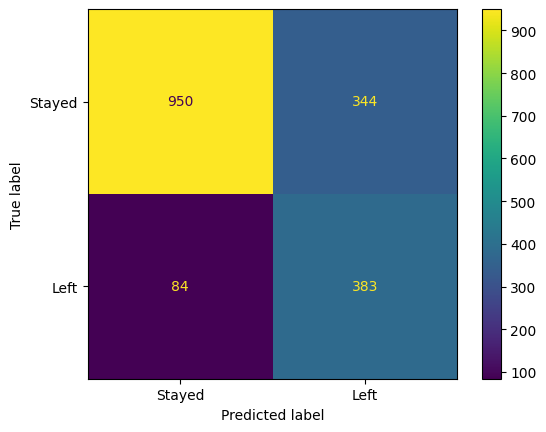

In [ ]:


ConfusionMatrixDisplay.from_estimator(clf_xgb,
                      X_test,
                      y_test,
                     values_format='d',
                      display_labels=["Stayed", "Left"])

In [ ]:
! pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.1 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
clf_xgb = xgb.XGBClassifier(seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss",
                        gamma=0.25,
                        learning_rate=0.08,
                        max_depth=4,
                        reg_lambda=10,
                        scale_pos_weight=3,
                        subsample=0.9,
                        colsample_bytree=0.5,
                        use_label_encoder=False,
                        early_stopping_rounds=10,
                            )
clf_xgb.fit(X_train,
            y_train,
            verbose=True,


            eval_set=[(X_test, y_test)])

[0]	validation_0-logloss:0.68630
[1]	validation_0-logloss:0.66350
[2]	validation_0-logloss:0.64398
[3]	validation_0-logloss:0.62728
[4]	validation_0-logloss:0.61220
[5]	validation_0-logloss:0.59792
[6]	validation_0-logloss:0.58653
[7]	validation_0-logloss:0.57550
[8]	validation_0-logloss:0.56556
[9]	validation_0-logloss:0.55727
[10]	validation_0-logloss:0.54993
[11]	validation_0-logloss:0.54230
[12]	validation_0-logloss:0.53664
[13]	validation_0-logloss:0.53125
[14]	validation_0-logloss:0.52638
[15]	validation_0-logloss:0.52223
[16]	validation_0-logloss:0.51904
[17]	validation_0-logloss:0.51538
[18]	validation_0-logloss:0.51144
[19]	validation_0-logloss:0.50800
[20]	validation_0-logloss:0.50526
[21]	validation_0-logloss:0.50258
[22]	validation_0-logloss:0.49981
[23]	validation_0-logloss:0.49764
[24]	validation_0-logloss:0.49547
[25]	validation_0-logloss:0.49398
[26]	validation_0-logloss:0.49244
[27]	validation_0-logloss:0.49066
[28]	validation_0-logloss:0.48915
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
explainer = shap.Explainer(clf_xgb)
shap_values = explainer(X_test)

# **9.The most important features**

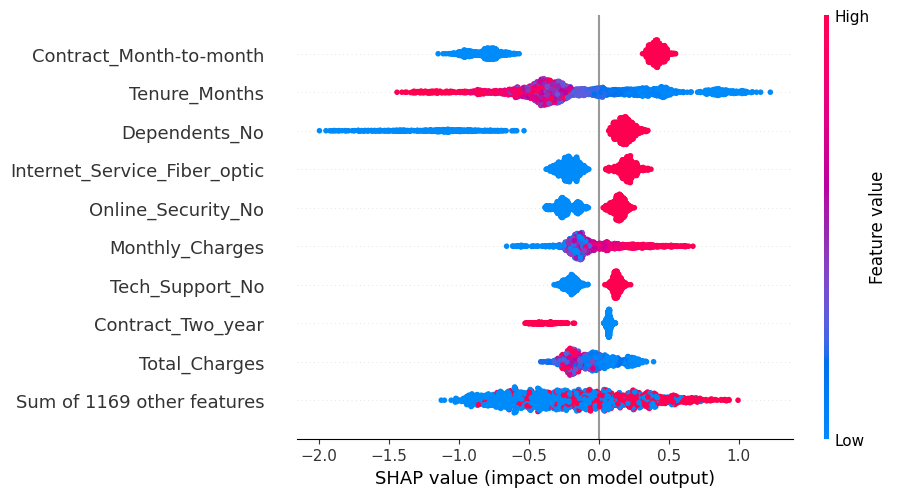

In [ ]:
shap.plots.beeswarm(shap_values)

# **References:**
#**[1].Data Structures, Algorithms, and Machine Learning Optimization, Jon Krohn-June 2021.**
#**[2]. Machine Learning With Go, Daniel Whitenack- September 2017.**
#**[3].Machine Learning with scikit-learn Quick Start Guide, Kevin Jolly-October 2018.**
#**[4].GitHub**

